In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
backend = matplotlib.get_backend()

def set_size(width=595, fraction=1, subplots=(1, 1)) -> tuple[float, float]:
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [2]:
backend

'module://matplotlib_inline.backend_inline'

## Plot Hopf bifurcation as in Exercise 4

In [1]:
fig = plt.figure(figsize=set_size(subplots=(1, 3)))
axs = fig.subplots(1, 3)

method = 'RK4'
fig.suptitle(f'Hopf bifurcation, {method} method')

for i, alpha in enumerate([-1, 0, 1]):
    data = np.loadtxt(f'{method}_Hopf_VectorField/results_{alpha}.txt')
    data_ = np.hsplit(data, 6)
    positions = data_[0]
    vectors = data_[2]

    r = np.linalg.norm(data_[2], axis=1)
    vectors_normalized = np.vstack((vectors[:, 0]/r, vectors[:, 1]/r))

    axs[i].streamplot(*[x.reshape((100, 100)) for x in positions.T], *[x.reshape((100, 100)) for x in vectors_normalized])
    axs[i].plot(0, 0, 'rx')
    axs[i].axis('square')
    axs[i].set_title(rf'$\alpha=${alpha}')
    axs[i].set_xlim(-4, 4)
    axs[i].set_ylim(-4 ,4)

fig.tight_layout()
matplotlib.use("pgf")
fig.savefig(f'Hopf_{method}.pgf')
matplotlib.use("cairo")
fig.savefig(f'Hopf_{method}.png')

NameError: name 'plt' is not defined

## Plot Hopf trajectory

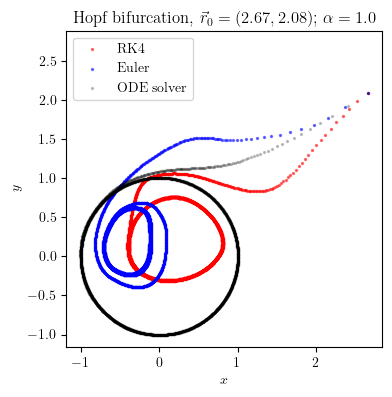

In [65]:
test_no = 2

single_test_nn_rk4 = np.loadtxt(f'RK4_Hopf_SingleTrajectory/Test_{test_no}/single_test_nn.txt')
single_test_nn_euler = np.loadtxt(f'Euler_Hopf_SingleTrajectory/Test_{test_no}/single_test_nn.txt')
single_test_odesolver = np.loadtxt(f'RK4_Hopf_SingleTrajectory/Test_{test_no}/single_test_odesolver.txt')

df = pd.read_csv('RK4_Hopf_SingleTrajectory/Test_0.txt', skiprows=1, sep=' ',
                 names=['k','x_0','y_0','alpha'])

df_test = df[df.k == test_no]

x0 = df_test.x_0.iloc[0]
y0 = df_test.y_0.iloc[0]
alpha = df_test.alpha.iloc[0]

plt.figure(figsize=set_size(fraction=0.8))
plt.scatter(*single_test_nn_rk4.T, c='red', alpha=0.5, s=2, label='RK4')
plt.scatter(*single_test_nn_euler.T, c='blue', alpha=0.5, s=2, label='Euler')
plt.scatter(*single_test_odesolver.T, c='black', alpha=0.2, s=2, label='ODE solver')
plt.axis('square')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()
plt.title(rf'Hopf bifurcation, $\vec{{r}}_0=({x0:.2f}, {y0:.2f})$; $\alpha={alpha}$')
plt.tight_layout()
plt.savefig(f'Hopf_{test_no}.png')

In [6]:

matplotlib.use('pgf')
fig = plt.figure(figsize=(set_size(fraction=1.0)[0], 3))
axs = fig.subplots(1, 3).flatten()

for i, test_no in enumerate([0, 1, 2]):

    single_test_nn_rk4 = np.loadtxt(f'RK4_Hopf_SingleTrajectory/Test_{test_no}/single_test_nn.txt')
    single_test_nn_euler = np.loadtxt(f'Euler_Hopf_SingleTrajectory/Test_{test_no}/single_test_nn.txt')
    single_test_odesolver = np.loadtxt(f'RK4_Hopf_SingleTrajectory/Test_{test_no}/single_test_odesolver.txt')

    df = pd.read_csv('RK4_Hopf_SingleTrajectory/Test_0.txt', skiprows=1, sep=' ',
                    names=['k','x_0','y_0','alpha'])

    df_test = df[df.k == test_no]
    if test_no == 0:
        x0 = df_test.x_0.iloc[0]
        y0 = df_test.y_0.iloc[0]
        fig.suptitle(rf'Hopf bifurcation, $\vec{{r}}_0=({x0:.2f}, {y0:.2f})$')
    alpha = df_test.alpha.iloc[0]

    axs[i].scatter(*single_test_nn_rk4.T, c='red', alpha=0.5, s=2, label='RK4', rasterized=True)
    axs[i].scatter(*single_test_nn_euler.T, c='blue', alpha=0.5, s=2, label='Euler', rasterized=True)
    axs[i].scatter(*single_test_odesolver.T, c='black', alpha=0.2, s=2, label='ODE solver', rasterized=True)
    axs[i].axis('square')
    axs[i].set_xlabel(r'$x$')
    axs[i].set_ylabel(r'$y$')
    axs[i].legend()
    axs[i].set_title(rf'$\alpha={alpha}$')
fig.tight_layout()
fig.savefig(f'Hopf.pgf')

## Plot Lorenz trajectory

8.892268390104627 5.608971653613128 9.81532438454676


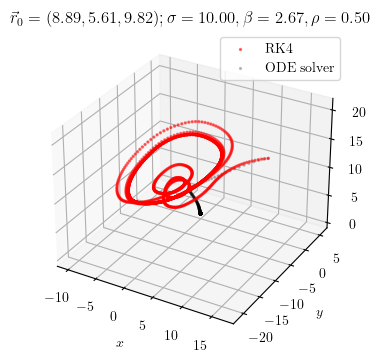

In [51]:
matplotlib.use('module://matplotlib_inline.backend_inline')
i = 1

single_test_nn_rk4 = np.loadtxt(f'RK4_Lorenz/Test_{i}/single_test_nn.txt')
single_test_nn_euler = np.loadtxt(f'Euler_Lorenz/Test_{i}/single_test_nn.txt')
single_test_odesolver = np.loadtxt(f'RK4_Lorenz/Test_{i}/single_test_odesolver.txt')

df = pd.read_csv('RK4_Lorenz/Test_0.txt', skiprows=1, sep=' ',
                 names=['k','x_0','y_0','z_0','sigma', 'beta', 'rho'])

df_test = df[df.k == i]

x0 = df_test.x_0.iloc[0]
y0 = df_test.y_0.iloc[0]
z0 = df_test.z_0.iloc[0]
print(x0, y0, z0)
sigma = df_test.sigma.iloc[0]
beta = df_test.beta.iloc[0]
rho = df_test.rho.iloc[0]

fig = plt.figure(figsize=set_size(fraction=0.8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*single_test_nn_rk4.T, c='red', alpha=0.5, s=2, label='RK4')
# ax.scatter(*single_test_nn_euler.T, c='blue', alpha=0.5, s=2, label='Euler') # commented because it blows up
ax.scatter(*single_test_odesolver.T, c='black', alpha=0.2, s=2, label='ODE solver')
ax.axis('square')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.legend()
ax.set_title(rf'$\vec{{r}}_0=({x0:.2f}, {y0:.2f}, {z0:.2f}); \sigma={sigma:.2f}, \beta={beta:.2f}, \rho={rho:.2f}$',
 wrap=True)
fig.savefig(f'Lorenz_{i}.png')

In [18]:
matplotlib.use('pgf')
# matplotlib.use('module://matplotlib_inline.backend_inline')
fig = plt.figure(figsize=set_size(fraction=1.0))

for i in [0, 1]:

    single_test_nn_rk4 = np.loadtxt(f'RK4_Lorenz/Test_{i}/single_test_nn.txt')
    single_test_nn_euler = np.loadtxt(f'Euler_Lorenz/Test_{i}/single_test_nn.txt')
    single_test_odesolver = np.loadtxt(f'RK4_Lorenz/Test_{i}/single_test_odesolver.txt')

    df = pd.read_csv('RK4_Lorenz/Test_0.txt', skiprows=1, sep=' ',
                    names=['k','x_0','y_0','z_0','sigma', 'beta', 'rho'])

    df_test = df[df.k == i]

    if i == 0:
        x0 = df_test.x_0.iloc[0]
        y0 = df_test.y_0.iloc[0]
        z0 = df_test.z_0.iloc[0]
        fig.suptitle(rf'Lorenz attractor, $\vec{{r}}_0=({x0:.2f}, {y0:.2f}, {z0:.2f})$')

    sigma = df_test.sigma.iloc[0]
    beta = df_test.beta.iloc[0]
    rho = df_test.rho.iloc[0]

    ax = fig.add_subplot(1, 2, i+1, projection='3d')
    ax.scatter(*single_test_nn_rk4.T, c='red', alpha=0.5, s=2, label='RK4', rasterized=True)
    # ax.scatter(*single_test_nn_euler.T, c='blue', alpha=0.5, s=2, label='Euler') # commented because it blows up
    ax.scatter(*single_test_odesolver.T, c='black', alpha=0.2, s=2, label='ODE solver', rasterized=True)
    ax.axis('square')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.legend()
    ax.set_title(rf'$\sigma={sigma:.2f}, \beta={beta:.2f}, \rho={rho:.2f}$')

# fig.tight_layout()
fig.savefig(f'Lorenz.pgf')
# plt.show()